<a href="https://colab.research.google.com/github/sfillingham/IK_ML_SwitchUP_notebooks/blob/main/IK_CalculusReview_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This Notebook will implement a basic gradient descent algorithm for the following cost function: **J(x) = x^2 - 4x + 3**

Start by defining both the cost function and the gradient of the cost function

In [8]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
def cost_J(x):
  return x**2 - 4*x +3

def grad_cost_dJ(x):
  return 2*x - 4

## Question 1 - Implement Gradient Descent

In [53]:
def gradient_descent(J, x, alpha, num_iters):
    """
    Performs Gradient Descent to optimize the cost function J(theta).

    Arguments:
    x -- initial parameter value (scalar)
    alpha -- learning rate (scalar)
    num_iters -- the number of iterations to run Gradient Descent (scalar)

    Returns:
    x_final -- optimized parameter value
    J_history -- vector of cost function values for each iteration (num_iters x 1)
    """
    J_history = []
    x_old = x
    count = 0

    # Your code here
    while count <= num_iters:
      #Calculate the gradient of the cost function given in the problem statement
      dj = 2 * x_old - 4
      #Determine the new parameter values
      x_new = x_old - alpha * dj

      #Calculate the new value of the cost function based on new parameter values
      J_new = J(x_new)
      J_history.append(J_new)
      x_final = x_new

      x_old = x_new
      count += 1

    return x_final, J_history

In [23]:
x_final, J_history = gradient_descent(cost_J, 10, 0.1, 100)

In [24]:
x_final

2.000000001629629

## Question 2 - Implement Different Convergence Criteria

In [27]:
def gradient_descent(J, dJ, x, alpha, tol, max_iters):

    """
    Performs gradient descent to minimize the objective function J.

    Arguments:
    J -- objective function to be minimized
    dJ -- gradient of the objective function
    x -- initial guess for the solution
    alpha -- learning rate
    tol -- tolerance for convergence
    max_iters -- maximum number of iterations to perform

    Returns:
    x_final -- solution to the optimization problem
    J_history -- vector of cost function values for each iteration (num_iters x 1)
    """

    iter = 0
    # Your code here
    J_history = []
    x_history = []
    J_history.append(J(x))
    x_history.append(x)
    x_old = x

    while iter < max_iters:

      #Determine the new parameter values
      x_new = x_old - alpha * dJ(x_old)
      x_history.append(x_new)

      #Calculate the new value of the cost function based on new parameter values
      J_old = J(x_old)
      J_new = J(x_new)
      J_history.append(J_new)
      x_final = x_new

      #Calculate the change in the cost function from the last parameter update
      #If this change is less than the input tol, break and return the final parameter value and cost function history
      J_diff = abs(J_new - J_old)
      if J_diff < tol:
        return x_final, J_history, x_history

      x_old = x_new
      iter += 1

    return x_final, J_history, x_history

In [110]:
x_final, J_history, x_history = gradient_descent(cost_J, grad_cost_dJ, 10, 0.1, 1e-9, 100)

In [72]:
x_final

2.0000374144419157

The final solution depends on the tolerance and max iterations. If the tolerance is large and the max iters is small, then the solution will converge prior to reaching the true minimum. While if the tolerance is small and/or the max iters is large, then the solution will get closer and closer to the true minimum.

## Question 3 - Comparison of Performance of Different Initializations

In [7]:
# list of initial x parameters to explore

x_params = list(range(-100, 100, 2))
x_time = []

for x in x_params:
  x_ouput, J_History, x_history = gradient_descent(cost_J, grad_cost_dJ, x, 0.1, 1e-9, 1000)
  x_time.append(len(J_History))

In [177]:
x_time = np.array(x_time)
x_params = np.array(x_params)

In [178]:
x_time

array([67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 66, 66, 66, 66, 66, 66, 66,
       66, 65, 65, 65, 65, 65, 65, 65, 64, 64, 64, 64, 64, 63, 63, 63, 63,
       62, 62, 62, 62, 61, 61, 60, 60, 60, 59, 58, 58, 57, 56, 55, 53, 50,
        2, 50, 53, 55, 56, 57, 58, 58, 59, 60, 60, 60, 61, 61, 62, 62, 62,
       62, 63, 63, 63, 63, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65,
       66, 66, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67])

So, this is about what is expected. The "best" initial value is when you happen to choose the global minimum as your starting value for parameter, x.
Otherwise its best to choose a value close to the minimum.
Moving forward we will select 9 to ensure that we get at least 50 iterations in the gradient descent.

## Question 4 - Impact of the Learning Rate

We will explore 3-4 different fixed learning rates with all other hyperparameters fixed to explore how varying the learning rate will change the nature of gradient descent. Specifically, how quickly gradient descent will converge into the global minimum.

Text(0.5, 1.0, 'Gradient Descent with alpha = 0.9')

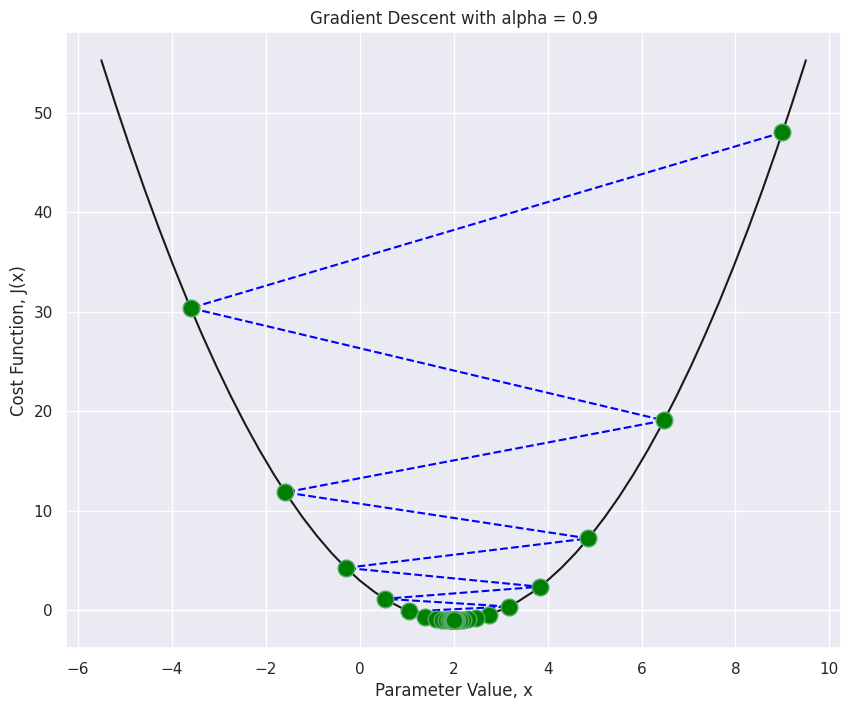

In [28]:
alpha = 0.9

x_ouput, J_History, x_History = gradient_descent(cost_J, grad_cost_dJ, 9, alpha, 1e-9, 1000)

x_params = np.linspace(-5.5, 9.5)
cost_values = np.array([cost_J(x) for x in x_params])


plt.figure(figsize=(10,8))
plt.plot(x_params, cost_values, c='k')
plt.plot(x_History, J_History, color='blue', linestyle='dashed', marker='o',
     markerfacecolor='green', markeredgecolor='g', markersize=12)

plt.xlabel("Parameter Value, x", size=12)
plt.ylabel("Cost Function, J(x)", size=12)
plt.title(f"Gradient Descent with alpha = {alpha}", size=12)

## Question 5 - Impact of Learning Strategies

**Inverse scaling of the learning rate**

In [25]:
def gradient_descent(J, dJ, x, alpha, tol, max_iters):

    """
    Performs gradient descent to minimize the objective function J.

    Arguments:
    J -- objective function to be minimized
    dJ -- gradient of the objective function
    x -- initial guess for the solution
    alpha -- learning rate
    tol -- tolerance for convergence
    max_iters -- maximum number of iterations to perform

    Returns:
    x_final -- solution to the optimization problem
    J_history -- vector of cost function values for each iteration (num_iters x 1)
    """

    iter = 0
    # Your code here
    J_history = []
    x_history = []
    J_history.append(J(x))
    x_history.append(x)
    x_old = x

    while iter < max_iters:

      #Determine the new parameter values
      x_new = x_old - alpha * dJ(x_old)
      x_history.append(x_new)

      #Calculate the new value of the cost function based on new parameter values
      J_old = J(x_old)
      J_new = J(x_new)
      J_history.append(J_new)
      x_final = x_new

      #Calculate the change in the cost function from the last parameter update
      #If this change is less than the input tol, break and return the final parameter value and cost function history
      J_diff = abs(J_new - J_old)
      if J_diff < tol:
        return x_final, J_history, x_history

      x_old = x_new
      iter += 1
      alpha = alpha/np.sqrt(iter)

    return x_final, J_history, x_history

Text(0.5, 1.0, 'Gradient Descent with alpha = 0.9')

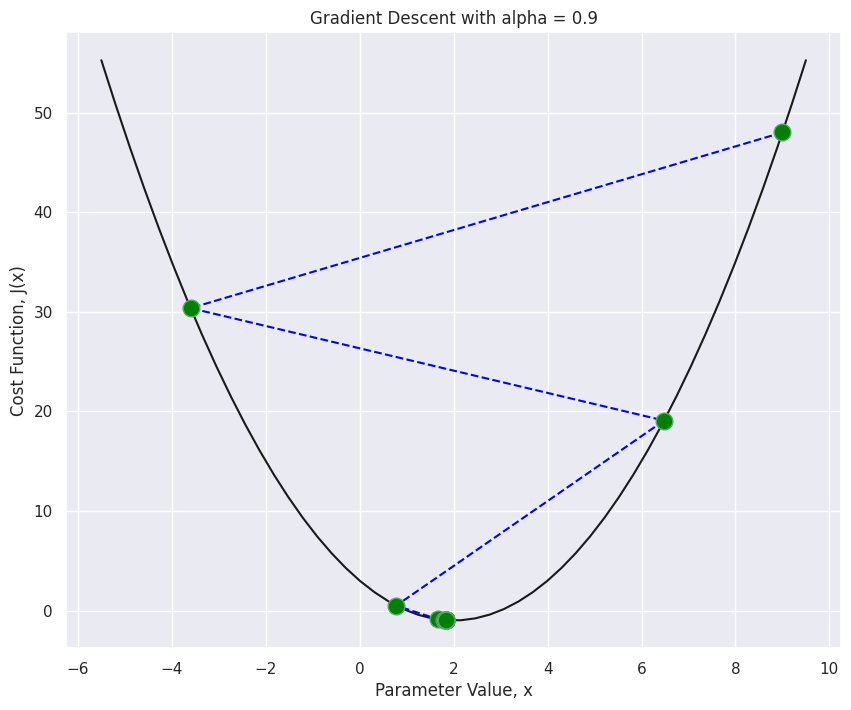

In [26]:
alpha = 0.9

x_ouput, J_History, x_History = gradient_descent(cost_J, grad_cost_dJ, 9, alpha, 1e-9, 1000)

x_params = np.linspace(-5.5, 9.5)
cost_values = np.array([cost_J(x) for x in x_params])


plt.figure(figsize=(10,8))
plt.plot(x_params, cost_values, c='k')
plt.plot(x_History, J_History, color='blue', linestyle='dashed', marker='o',
     markerfacecolor='green', markeredgecolor='g', markersize=12)

plt.xlabel("Parameter Value, x", size=12)
plt.ylabel("Cost Function, J(x)", size=12)
plt.title(f"Gradient Descent with alpha = {alpha}", size=12)

**This implements the adaptive learning rate, where we decrease alpha anytime we detect a change in the sign of the gradient. In otherwords, any time the new parameters jump over the minimum we decrease the learning rate.**

In [21]:
def gradient_descent(J, dJ, x, alpha, tol, max_iters):

    """
    Performs gradient descent to minimize the objective function J.

    Arguments:
    J -- objective function to be minimized
    dJ -- gradient of the objective function
    x -- initial guess for the solution
    alpha -- learning rate
    tol -- tolerance for convergence
    max_iters -- maximum number of iterations to perform

    Returns:
    x_final -- solution to the optimization problem
    J_history -- vector of cost function values for each iteration (num_iters x 1)
    """

    iter = 0
    # Your code here
    J_history = []
    x_history = []
    J_history.append(J(x))
    x_history.append(x)
    x_old = x

    while iter < max_iters:

      #Determine the new parameter values
      dj_sign = np.sign(dJ(x_old))

      x_new = x_old - alpha * dJ(x_old)
      x_history.append(x_new)

      #Calculate the new value of the cost function based on new parameter values
      J_old = J(x_old)
      J_new = J(x_new)
      J_history.append(J_new)
      x_final = x_new

      #Calculate the change in the cost function from the last parameter update
      #If this change is less than the input tol, break and return the final parameter value and cost function history
      J_diff = abs(J_new - J_old)
      if J_diff < tol:
        return x_final, J_history, x_history

      if np.sign(dJ(x_new)) != dj_sign:
        alpha /= 5
      x_old = x_new
      iter += 1

    return x_final, J_history, x_history

Text(0.5, 1.0, 'Gradient Descent with alpha = 0.9')

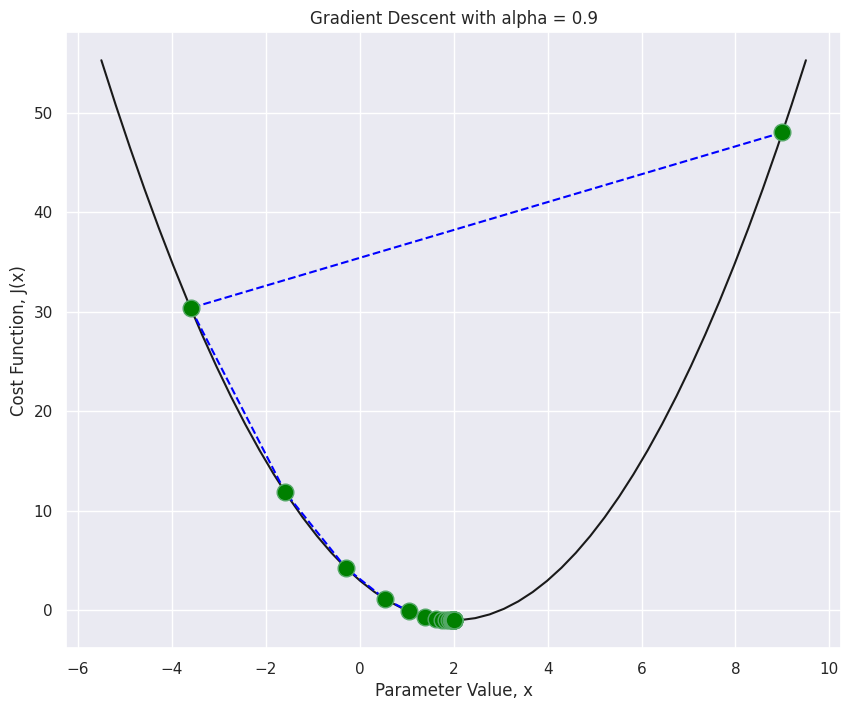

In [24]:
alpha = 0.9

x_ouput, J_History, x_History = gradient_descent(cost_J, grad_cost_dJ, 9, alpha, 1e-9, 1000)

x_params = np.linspace(-5.5, 9.5)
cost_values = np.array([cost_J(x) for x in x_params])


plt.figure(figsize=(10,8))
plt.plot(x_params, cost_values, c='k')
plt.plot(x_History, J_History, color='blue', linestyle='dashed', marker='o',
     markerfacecolor='green', markeredgecolor='g', markersize=12)

plt.xlabel("Parameter Value, x", size=12)
plt.ylabel("Cost Function, J(x)", size=12)
plt.title(f"Gradient Descent with alpha = {alpha}", size=12)